## 土地資料
> https://plvr.land.moi.gov.tw/DownloadOpenData


In [1]:
import pandas as pd

In [19]:
S1_106 = pd.read_csv('./106to108/106_S1_F_lvr_land_A.csv', error_bad_lines=False)
S1_106 = S1_106.drop(S1_106.index[0])
S1_106.isnull().sum()

鄉鎮市區                 0
交易標的                 0
土地區段位置/建物區段門牌        0
土地移轉總面積平方公尺        903
都市土地使用分區         12095
非都市土地使用分區        12100
非都市土地使用編定            0
交易年月日                0
交易筆棟數             1715
移轉層次              1721
總樓層數                 0
建物型態              1720
主要用途              1717
主要建材              2055
建築完成年月               0
建物移轉總面積平方公尺          0
建物現況格局-房             0
建物現況格局-廳             0
建物現況格局-衛             0
建物現況格局-隔間            0
有無管理組織               0
總價元                430
單價元/平方公尺          6430
車位類別                 0
車位移轉總面積平方公尺          0
車位總價元             9141
備註                   0
編號               12858
dtype: int64

In [20]:
S1_106.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12858 entries, 土城區 to 淡水區
Data columns (total 28 columns):
鄉鎮市區             12858 non-null object
交易標的             12858 non-null object
土地區段位置/建物區段門牌    12858 non-null object
土地移轉總面積平方公尺      11955 non-null object
都市土地使用分區         763 non-null object
非都市土地使用分區        758 non-null object
非都市土地使用編定        12858 non-null object
交易年月日            12858 non-null object
交易筆棟數            11143 non-null object
移轉層次             11137 non-null object
總樓層數             12858 non-null object
建物型態             11138 non-null object
主要用途             11141 non-null object
主要建材             10803 non-null object
建築完成年月           12858 non-null object
建物移轉總面積平方公尺      12858 non-null object
建物現況格局-房         12858 non-null object
建物現況格局-廳         12858 non-null object
建物現況格局-衛         12858 non-null object
建物現況格局-隔間        12858 non-null object
有無管理組織           12858 non-null object
總價元              12428 non-null object
單價元/平方公尺         6428 non-null object
車位類別

In [2]:
col_name = ['district', 'sign', 'address', 'square', 'zone', 'n1', 'n2' , 'date', 'stuff' , 'level', 'floor', 'state', 'use', 'material', 'complete', 'area', 'room', 'hall', 'health', 'compartmented', 'manage', 'price', 'square price', 'park', 'park_size', 'park_price', 'note', 'sId']

landDF = pd.DataFrame(columns=col_name)
# 自訂顯示幾個feature
# pd.set_option('display.max_columns', 30)
landDF

,district,sign,address,square,zone,n1,n2,date,stuff,level,...,health,compartmented,manage,price,square price,park,park_size,park_price,note,sId


In [7]:
for j in range(106, 108):
    # 取得 a-x檔案內的資料
    for i in range(1, 5):
        try:
            temp = pd.read_csv('./106to108/' + str(j) + '_S' + str(i) + '_F_lvr_land_A.csv', header=None, names=col_name)
            temp = temp.drop(temp.index[0])
            landDF = landDF.append(temp, ignore_index=True)
        except Exception as e:
            print(e)
            continue

In [8]:
print(landDF.shape)

(104104, 28)


In [9]:
# 整合結果後輸出成新csv
landDF.to_csv('all_F_lvr_land_A.csv', index=False)

### EDA

In [35]:
S1_106['建物現況格局-房'] = S1_106['建物現況格局-房'].astype(float)
S1_106['建物移轉總面積平方公尺'] = S1_106['建物移轉總面積平方公尺'].astype(float)
S1_106['建物現況格局-廳'] = S1_106['建物現況格局-廳'].astype(float)
S1_106['總價元'] = S1_106['總價元'].astype(float)
# S1_106['單價元/平方公尺'] = S1_106['單價元/平方公尺'].astype(float) #內含非數字

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# 避免特定的錯誤提示
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# plt.plot(S1_106['總價元'])
# plt.title('總價元', fontproperties="SimSun", fontsize=20)
# plt.show()

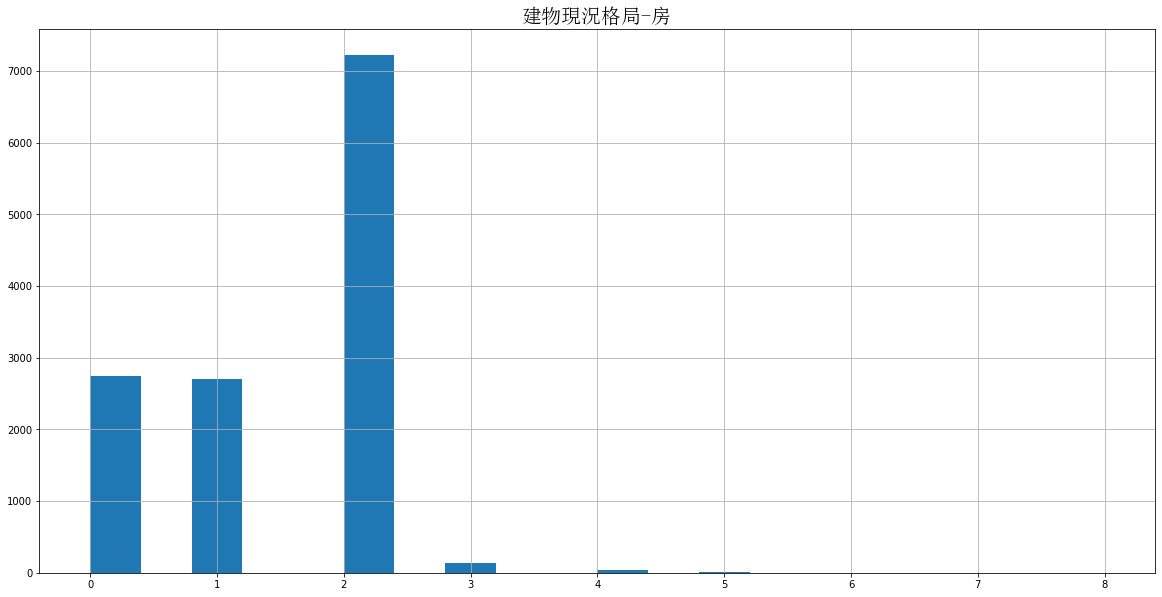

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

S1_106['建物現況格局-房'].hist(figsize=(20,10), bins=20) # bins為長條組數
plt.title('建物現況格局-房', fontproperties="SimSun", fontsize=20)
plt.show()

In [8]:
S1_106.corr()

""


### 合成一個csv